In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv("../data/lifestyle_wellbeing.csv")
df.head()

,age,gender,sleep_hours,daily_steps,exercise_minutes_week,water_intake_liters,stress_level,nutrition_quality,screen_time_hours,wellbeing_score
0,36 to 50,Female,7,5,233,2.31,2,3,3,609.5
1,36 to 50,Female,8,5,73,2.78,3,2,2,655.6
2,36 to 50,Female,8,4,235,3.05,3,2,3,631.6
3,51 or more,Female,5,5,270,2.97,3,3,5,622.7
4,51 or more,Female,7,5,70,1.63,1,5,3,663.9


In [37]:
np.random.seed(42) # same random numbers are generated every time the code runs.

#### Generate Synthetic Data

In [38]:
n_samples = 1000
df = pd.DataFrame({
    'age': np.random.randint(18, 81, n_samples),
    'gender': np.random.choice(['M', 'F'], n_samples),
    'sleep_hours': np.clip(np.random.normal(7, 1.5, n_samples), 4, 12),
    'daily_steps': np.clip(np.random.normal(7000, 3000, n_samples), 0, 30000),
    'exercise_minutes_week': np.clip(np.random.normal(150, 100, n_samples), 0, 1000),
    'water_intake_liters': np.clip(np.random.normal(1.5, 0.7, n_samples), 0.5, 5),
    'stress_level': np.random.randint(1, 11, n_samples),
    'nutrition_quality': np.random.randint(1, 11, n_samples),
    'screen_time_hours': np.clip(np.random.normal(4, 2, n_samples), 0, 16),
    'wellbeing_score': np.clip(np.random.normal(70, 15, n_samples), 0, 100)
})

#### Examine the data

In [39]:
df.head()

,age,gender,sleep_hours,daily_steps,exercise_minutes_week,water_intake_liters,stress_level,nutrition_quality,screen_time_hours,wellbeing_score
0,56,M,7.644427,1374.482591,209.502947,1.910316,4,10,4.098656,93.040918
1,69,M,7.311532,7345.078237,94.257695,1.211310,10,10,5.444894,78.963066
2,46,F,7.407368,6519.601613,108.700218,1.680039,10,9,3.269438,59.330452
3,32,F,5.084877,9014.020229,57.330169,1.331534,8,4,8.775935,71.756863
4,60,F,5.378415,7639.589885,146.856083,1.505516,5,7,4.360142,73.543355


In [40]:
df.describe()

,age,sleep_hours,daily_steps,exercise_minutes_week,water_intake_liters,stress_level,nutrition_quality,screen_time_hours,wellbeing_score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,50.380000,7.154181,7042.674018,152.733313,1.486812,5.56600,5.464000,3.950166,69.943086
std,18.378666,1.456075,2886.156200,97.081133,0.629726,2.91447,2.998616,2.009514,15.272339
min,18.000000,4.000000,0.000000,0.000000,0.500000,1.00000,1.000000,0.000000,14.674521
25%,35.000000,6.143718,5060.332199,77.864864,1.009438,3.00000,3.000000,2.478661,59.470806
50%,50.000000,7.116593,7019.833172,148.331451,1.480597,6.00000,5.000000,3.908948,69.561393
75%,66.000000,8.109448,8982.745943,218.589725,1.918614,8.00000,8.000000,5.399490,80.655622
max,80.000000,11.789661,16413.245601,542.623771,3.706440,10.00000,10.000000,11.058110,100.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    1000 non-null   int32  
 1   gender                 1000 non-null   object 
 2   sleep_hours            1000 non-null   float64
 3   daily_steps            1000 non-null   float64
 4   exercise_minutes_week  1000 non-null   float64
 5   water_intake_liters    1000 non-null   float64
 6   stress_level           1000 non-null   int32  
 7   nutrition_quality      1000 non-null   int32  
 8   screen_time_hours      1000 non-null   float64
 9   wellbeing_score        1000 non-null   float64
dtypes: float64(6), int32(3), object(1)
memory usage: 66.5+ KB


#### checking for missing values

In [42]:
df.isnull().sum()

age                      0
gender                   0
sleep_hours              0
daily_steps              0
exercise_minutes_week    0
water_intake_liters      0
stress_level             0
nutrition_quality        0
screen_time_hours        0
wellbeing_score          0
dtype: int64

#### Visual distributions and relationships

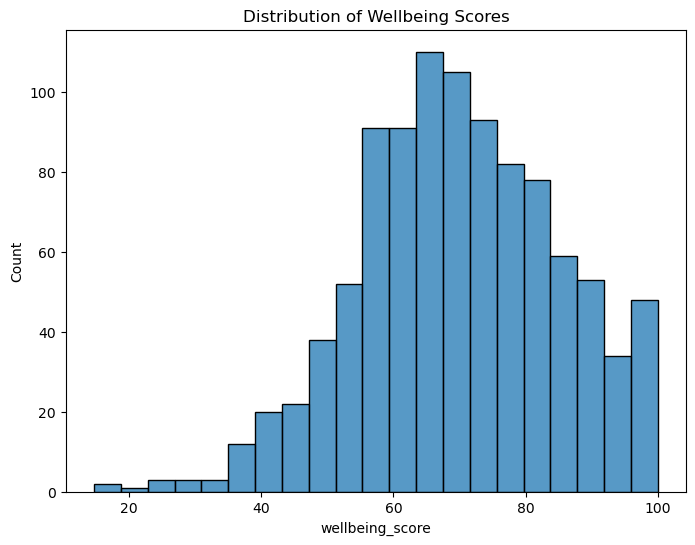

In [50]:
plt.figure(figsize=(8, 6))
sns.histplot(df['wellbeing_score'])
plt.title('Distribution of Wellbeing Scores')
plt.show()

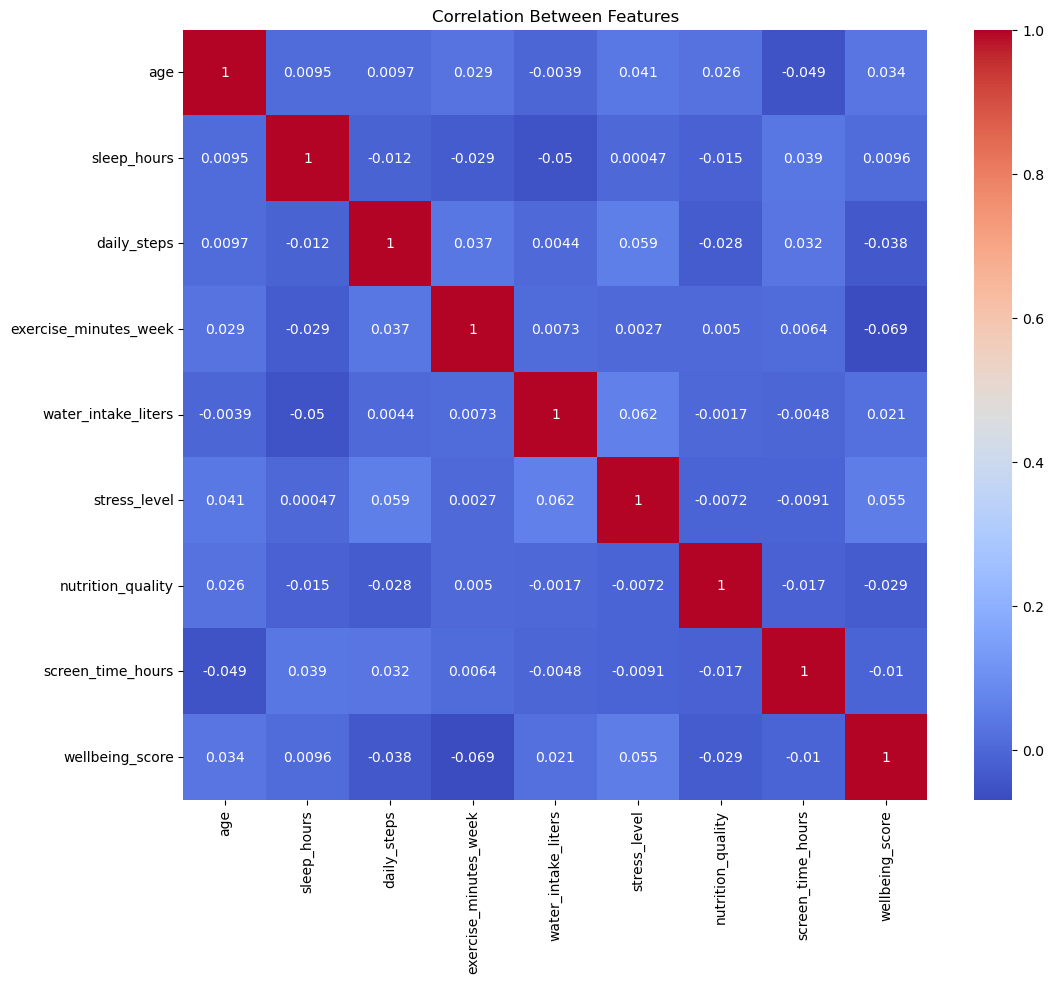

In [56]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()